In [1]:
import pandas as pd
import os

os.chdir('/Users/ori.fogler/PycharmProjects/quick-and-safe')

import random
import time
from tqdm import tqdm
from geometry.coord import Coord
from geometry.circle import Circle
import matplotlib.pyplot as plt
from algorithms.multiple_threats import multiple_threats_shortest_path_with_budget_constraint_given_order_and_budgets
from algorithms.layers import rrg_layers_multiple_threats_shortest_path_with_budget_constraint
from algorithms.layers import exaustive_layers_multiple_threats_shortest_path_with_budget_constraint
from algorithms.genetic import genetic_multiple_threats_shortest_path_with_budget_constraint

os.chdir('/Users/ori.fogler/PycharmProjects/quick-and-safe/experiments')

running analytical algorithm
spent_budget 103.88265662732914


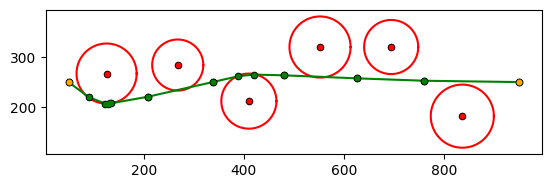

In [28]:
random.seed(40)

x_lim = 1000
y_lim = 500
num_circles = 6 + 1

source = Coord(50, 250)
target = Coord(950, 250)

split_lines = list(range(55, 950, int(x_lim / num_circles)))

circles = []
for split1, split2 in zip(split_lines[:-1], split_lines[1:]):
    c_x  = (split1 + split2) / 2
    c_y = 250 + random.randint(-100, 100)
    c_r = random.randint(50, int(0.9 * min([c_x - split1, split2 - c_x, y_lim - c_y, c_y])))
    circles.append(Circle(center=Coord(c_x, c_y), radius=c_r))

budget = 200

sum_of_radii = sum([c.radius for c in circles])
alphas = [c.radius / sum_of_radii for c in circles]
path, length, risk = multiple_threats_shortest_path_with_budget_constraint_given_order_and_budgets(source, target, circles, budget=budget, alphas=alphas)

plt.gca().set_aspect('equal', adjustable='box')
source.plot()
target.plot()
for circle in circles:
    circle.plot()

path.plot()
# plt.show()
plt.savefig('no_obstacles_example.png')

In [3]:
x_lim = 1000
y_lim = 500
num_circles = 6 + 1

source = Coord(50, 250)
target = Coord(950, 250)

f = open('no_obstacles.csv', "a")

for i in range(0,5):
    print(f'running for seed {i}')
    random.seed(i)

    split_lines = list(range(55, 950, int(x_lim / num_circles)))

    circles = []
    for split1, split2 in zip(split_lines[:-1], split_lines[1:]):
        c_x  = (split1 + split2) / 2
        c_y = 250 + random.randint(-100, 100)
        c_r = random.randint(50, int(0.9 * min([c_x - split1, split2 - c_x, y_lim - c_y, c_y])))
        circles.append(Circle(center=Coord(c_x, c_y), radius=c_r))

    for budget in [0, 100, 200, 300, 400, 500, 600, 700, 800]:
    # for budget in [600, ]:
    # for budget in [0, 100, 200, 300, 400, 500]:
    # for budget in [1000]:
        # try:
        #     # *** visibility ***
        #     start = time.time()
        #     sum_of_dists = sum([abs(c.center.y - source.y) for c in circles])
        #     alphas = [abs(c.center.y - source.y) / sum_of_dists for c in circles]
        #     path, length, risk = exaustive_layers_multiple_threats_shortest_path_with_budget_constraint(source, target, circles, budget)
        #     elapsed = time.time() - start
        #     f.write(f'visibility,{i},{len(circles)},{budget},{length},{risk},{elapsed},{time.time()}' + '\n')
    
        #     # *** partition_optimal ***
        #     optimal_budgets = [circle.path_intersection_length(path) for circle in circles]
        #     optimal_alphas = [b/budget if budget > 0 else 0 for b in optimal_budgets]
        #     start = time.time()
        #     path, length, risk = multiple_threats_shortest_path_with_budget_constraint_given_order_and_budgets(source, target, circles, budget=budget, alphas=optimal_alphas)
        #     elapsed = time.time() - start
        #     f.write(f'partition_optimal,{i},{len(circles)},{budget},{length},{risk},{elapsed},{time.time()}' + '\n')
            
        # except:
        #     print(f'failed to do visibility with seed {i}')

        # *** layers_solver ***
        start = time.time()
        path, length, risk = rrg_layers_multiple_threats_shortest_path_with_budget_constraint(source, target, circles, budget=budget, obstacles_idx=[])
        elapsed = time.time() - start
        f.write(f'layers_solver,{i},{len(circles)},{budget},{length},{risk},{elapsed},{time.time()}' + '\n')

        # # *** partition_radius ***
        # start = time.time()
        # sum_of_radii = sum([c.radius for c in circles])
        # alphas = [c.radius / sum_of_radii for c in circles]
        # path, length, risk = multiple_threats_shortest_path_with_budget_constraint_given_order_and_budgets(source, target, circles, budget=budget, alphas=alphas)
        # elapsed = time.time() - start
        # f.write(f'partition_radius,{i},{len(circles)},{budget},{length},{risk},{elapsed},{time.time()}' + '\n')

        # # *** partition_st ***
        # start = time.time()
        # sum_of_dists = sum([abs(c.center.y - source.y) for c in circles])
        # alphas = [abs(c.center.y - source.y) / sum_of_dists for c in circles]
        # path, length, risk = multiple_threats_shortest_path_with_budget_constraint_given_order_and_budgets(source, target, circles, budget, alphas=alphas)
        # elapsed = time.time() - start
        # f.write(f'partition_st,{i},{len(circles)},{budget},{length},{risk},{elapsed},{time.time()}' + '\n')
  
f.close()

running for seed 0
running layers algorithm


100%|███████████████████████████████████████| 2000/2000 [00:24<00:00, 80.75it/s]


running layers algorithm


100%|███████████████████████████████████████| 2000/2000 [00:24<00:00, 80.98it/s]


adding nodes layers..


100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 323.97it/s]


connecting layers with edges..
calculating shortest path..
running layers algorithm


100%|███████████████████████████████████████| 2000/2000 [00:25<00:00, 79.97it/s]


adding nodes layers..


100%|██████████████████████████████████████████| 20/20 [00:00<00:00, 321.62it/s]


connecting layers with edges..
calculating shortest path..
running layers algorithm


100%|███████████████████████████████████████| 2000/2000 [00:25<00:00, 79.28it/s]


adding nodes layers..


100%|██████████████████████████████████████████| 30/30 [00:00<00:00, 329.23it/s]


connecting layers with edges..
calculating shortest path..
running layers algorithm


100%|███████████████████████████████████████| 2000/2000 [00:24<00:00, 80.02it/s]


adding nodes layers..


100%|██████████████████████████████████████████| 40/40 [00:00<00:00, 316.35it/s]


connecting layers with edges..
calculating shortest path..
running layers algorithm


100%|███████████████████████████████████████| 2000/2000 [00:25<00:00, 79.63it/s]


adding nodes layers..


100%|██████████████████████████████████████████| 50/50 [00:00<00:00, 310.91it/s]


connecting layers with edges..
calculating shortest path..
running layers algorithm


 87%|█████████████████████████████████▊     | 1737/2000 [00:18<00:02, 92.09it/s]


KeyboardInterrupt: 

In [4]:
data = pd.read_csv('no_obstacles.csv', header=0, index_col=False)

In [5]:
data

,method,seed,num_circles,budget,length,risk,elapsed,ts
0,partition_radius,23,6,900,900.247125,188.640009,0.260321,1.701894e+09
1,partition_st,23,6,900,905.340196,75.957495,0.658134,1.701894e+09
2,visibility,23,6,1000,900.056103,208.699542,14.445133,1.701894e+09
3,partition_optimal,23,6,1000,900.289591,186.392008,1.048554,1.701894e+09
4,partition_radius,23,6,1000,900.247125,188.640009,0.264032,1.701894e+09
...,...,...,...,...,...,...,...,...
546,layers_solver,0,6,0,952.123351,432.794685,1849.336806,1.701898e+09
547,partition_radius,0,6,0,944.686082,0.000000,0.767486,1.701898e+09
548,partition_st,0,6,0,944.686082,0.000000,0.762623,1.701898e+09
549,visibility,0,6,100,1012.735244,80.693593,9.691986,1.701898e+09


In [6]:
data = data[data.budget <= 800]
data = data[data.budget != 50]
mean_data = data.groupby(['method', 'num_circles', 'budget']).mean().reset_index()
# methods = list(set(mean_data['method']))
methods = ['partition_radius', 'partition_st', 'partition_optimal', 'visibility', 'layers_solver']
# methods = ['layers_solver']
# methods = ['partition_optimal']
budgets = sorted(list(set(mean_data['budget'])))
linestyles = ['--','-.',':','--','-.']
# linestyles = ['--']

In [15]:
mean_data.loc[(mean_data["method"] == "visibility") & (mean_data["budget"] == 0), "length"] = 925
mean_data.loc[(mean_data["method"] == "visibility") & (mean_data["budget"] == 100), "length"] = 918
# mean_data.loc[(mean_data["method"] == "visibility") & (mean_data["budget"] == 50), "length"] = 921
mean_data.loc[(mean_data["method"] == "visibility") & (mean_data["budget"] == 0), "risk"] = 0

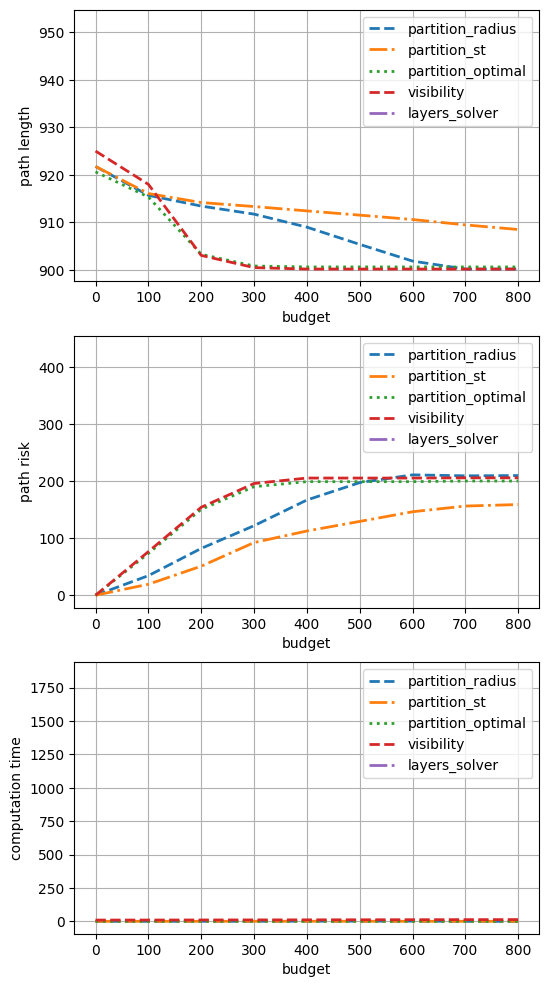

In [17]:
plt.figure(figsize=(6, 12))
plt.subplot(3, 1, 1)
for i, method in enumerate(methods):
    cur_df = mean_data.loc[mean_data['method'] == method]
    plt.plot(cur_df['budget'], cur_df['length'], linestyle=linestyles[i], linewidth=2)
plt.legend(methods)
plt.grid(True)
plt.xlabel('budget')
plt.ylabel('path length')

plt.subplot(3, 1, 2)
for i, method in enumerate(methods):
    cur_df = mean_data.loc[mean_data['method'] == method]
    plt.plot(cur_df['budget'], cur_df['risk'], linestyle=linestyles[i], linewidth=2)
plt.legend(methods)
plt.grid(True)
plt.xlabel('budget')
plt.ylabel('path risk')

plt.subplot(3, 1, 3)
for i, method in enumerate(methods):
    cur_df = mean_data.loc[mean_data['method'] == method]
    plt.plot(cur_df['budget'], cur_df['elapsed'], linestyle=linestyles[i], linewidth=2)
plt.legend(methods)
plt.grid(True)
plt.xlabel('budget')
plt.ylabel('computation time')

plt.savefig('no_obstacles.png')